In [4]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , Literal

In [5]:
class Plus(TypedDict):
    user: bool
    a: int
    b: str

In [6]:
def a_func(state: Plus) -> Plus:
    return {'a' : 100}

def b_func(state: Plus) -> Plus:
    return {'b': 'Errors'}

def condition(state: Plus) -> Literal['a', 'b']:
    if state['user'] is True:
        return 'a'
    elif state['user'] is False:
        return 'b'


{'user': True, 'a': 100}


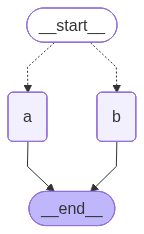

In [16]:
graphs_state= StateGraph(Plus)
graphs_state.add_node('a', a_func)
graphs_state.add_node('b', b_func)
graphs_state.add_conditional_edges(START , condition)
graphs_state.add_edge('a', END)
graphs_state.add_edge('b', END)

workflow= graphs_state.compile()
print(workflow.invoke({'user' : True}))
workflow
